Logistic Regression

------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
import pandas as pd

file_path = "C:\\Users\\roari\\Downloads\\Logistic regression\\breast_cancer_dataset.xlsx"
df = pd.read_excel(file_path)


In [4]:
print("Size of the dataset:", df.size)
print("Shape of the dataset:", df.shape)
print("Info of the dataset:")
print(df.info())


Size of the dataset: 17639
Shape of the dataset: (569, 31)
Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  

C:\Users\roari\AppData\Local\Temp\ipykernel_44224\2237049822.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set1')


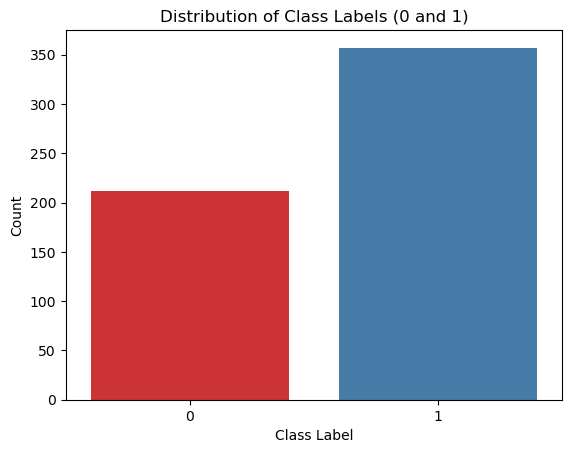

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot to visualize the distribution of class labels
sns.countplot(x='target', data=df, palette='Set1')

# Set plot labels and title
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels (0 and 1)')

# Show the plot
plt.show()


In [9]:
# Count the number of occurrences of each class label
class_counts = df['target'].value_counts()

# Display the counts
print(class_counts)


target
1    357
0    212
Name: count, dtype: int64


Logistic regression Before L2 regularization

C:\Users\roari\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


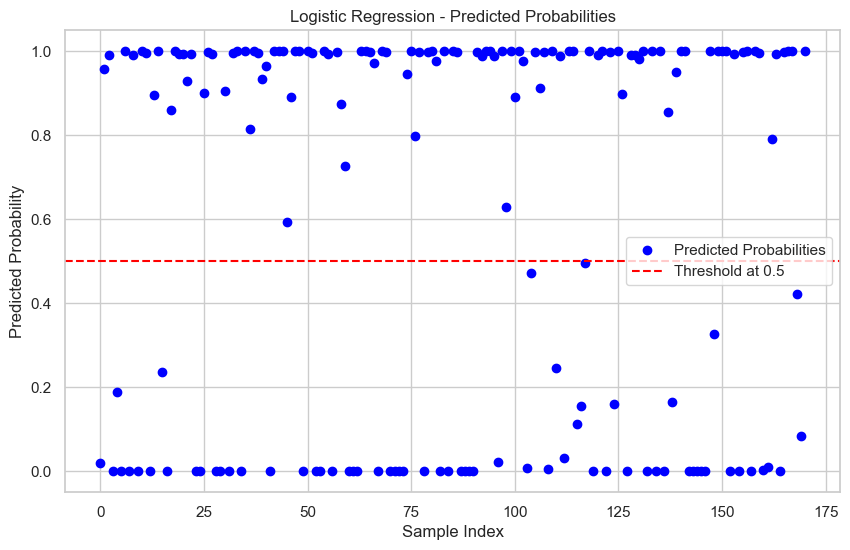

Training Accuracy: 0.99
Testing Accuracy: 0.96
Precision: 0.98
Recall: 0.96
F1 Score: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        64
           1       0.98      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

True Positives (TP): 103
True Negatives (TN): 62
False Positives (FP): 2
False Negatives (FN): 4

Points above 0.5 threshold: 105
Points below 0.5 threshold: 66


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the data
file_path = Path('C:/Users/roari/Downloads/Logistic regression/breast_cancer_dataset.xlsx')
data = pd.read_excel(file_path)  # Use read_excel since it's an .xlsx file

# Define features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Build the logistic regression model without regularization (penalty=None)
logreg = LogisticRegression(penalty=None, solver='saga', random_state=42)
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Plotting the Sigmoid Curve
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot of predicted probabilities
plt.scatter(range(len(y_pred_proba)), y_pred_proba, color='blue', marker='o', label='Predicted Probabilities')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold at 0.5')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression - Predicted Probabilities')
plt.legend()

# Show plot
plt.show()

# Number of points above and below threshold
above_threshold = np.sum(y_pred_proba > 0.5)
below_threshold = np.sum(y_pred_proba <= 0.5)

# Output the results
print("Training Accuracy: {:.2f}".format(logreg.score(X_train, y_train)))
print("Testing Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("\nClassification Report:\n", class_report)

print("True Positives (TP):", conf_matrix[1, 1])
print("True Negatives (TN):", conf_matrix[0, 0])
print("False Positives (FP):", conf_matrix[0, 1])
print("False Negatives (FN):", conf_matrix[1, 0])

print("\nPoints above 0.5 threshold:", above_threshold)
print("Points below 0.5 threshold:", below_threshold)

# Analysis on True Positive, True Negative, False Positive, and False Negative:
# - True Positives (TP): Correctly identified malignant tumors.
# - True Negatives (TN): Correctly identified benign tumors.
# - False Positives (FP): Benign tumors incorrectly identified as malignant (Type I error).
# - False Negatives (FN): Malignant tumors incorrectly identified as benign (Type II error).

# The effect of FP and FN on analysis:
# - High FP rate can cause unnecessary worry and additional tests for patients.
# - High FN rate is more dangerous as it can lead to missed diagnoses of cancer, potentially delaying critical treatment.


------------------------------------------------------------------------------------------------------------------------------------------------------

Logistic Regression after L2 regularization

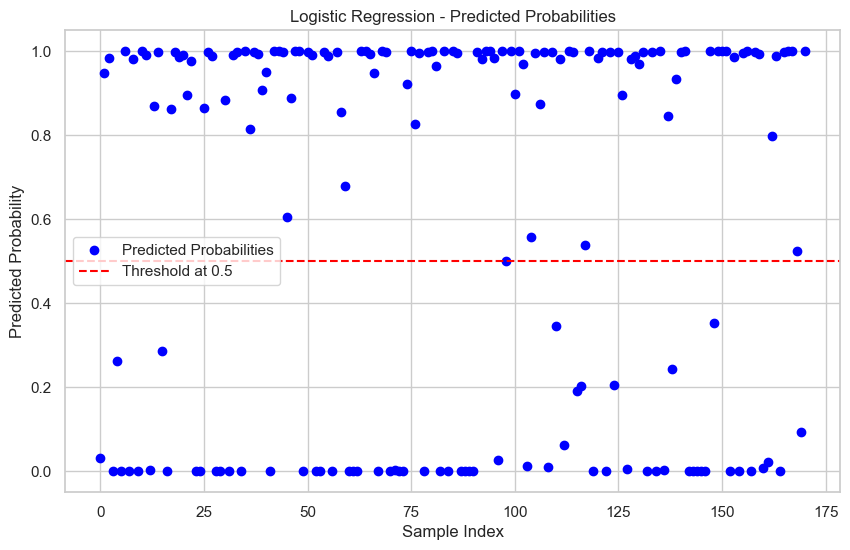

Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.98
Recall: 0.99
F1 Score: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

True Positives (TP): 106
True Negatives (TN): 62
False Positives (FP): 2
False Negatives (FN): 1

Points above 0.5 threshold: 108
Points below 0.5 threshold: 63


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the data
file_path = Path('C:/Users/roari/Downloads/Logistic regression/breast_cancer_dataset.xlsx')
data = pd.read_excel(file_path)  # Use read_excel since it's an .xlsx file

# Define features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Build the logistic regression model with L2 regularization (default in LogisticRegression)
logreg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Plotting the Sigmoid Curve
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot of predicted probabilities
plt.scatter(range(len(y_pred_proba)), y_pred_proba, color='blue', marker='o', label='Predicted Probabilities')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold at 0.5')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression - Predicted Probabilities')
plt.legend()

# Show plot
plt.show()

# Number of points above and below threshold
above_threshold = np.sum(y_pred_proba > 0.5)
below_threshold = np.sum(y_pred_proba <= 0.5)

# Output the results
print("Training Accuracy: {:.2f}".format(logreg.score(X_train, y_train)))
print("Testing Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("\nClassification Report:\n", class_report)

print("True Positives (TP):", conf_matrix[1, 1])
print("True Negatives (TN):", conf_matrix[0, 0])
print("False Positives (FP):", conf_matrix[0, 1])
print("False Negatives (FN):", conf_matrix[1, 0])

print("\nPoints above 0.5 threshold:", above_threshold)
print("Points below 0.5 threshold:", below_threshold)

# Analysis on True Positive, True Negative, False Positive, and False Negative:
# - True Positives (TP): Correctly identified malignant tumors.
# - True Negatives (TN): Correctly identified benign tumors.
# - False Positives (FP): Benign tumors incorrectly identified as malignant (Type I error).
# - False Negatives (FN): Malignant tumors incorrectly identified as benign (Type II error).

# The effect of FP and FN on analysis:
# - High FP rate can cause unnecessary worry and additional tests for patients.
# - High FN rate is more dangerous as it can lead to missed diagnoses of cancer, potentially delaying critical treatment.


------------------------------------------------------------------------------------------------------------------------------------------------------

Comparing both logistic regression

C:\Users\roari\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


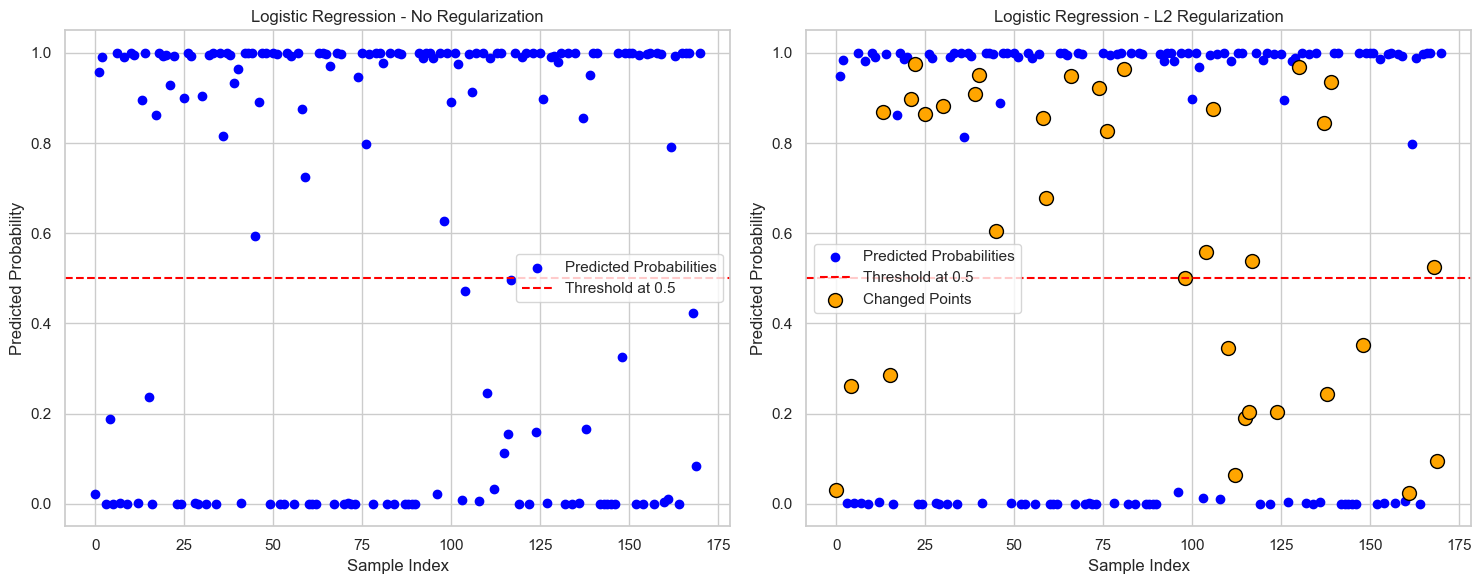

Training Accuracy (No Regularization): 0.99
Testing Accuracy (No Regularization): 0.96

Classification Report (No Regularization):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        64
           1       0.98      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Training Accuracy (L2 Regularization): 0.99
Testing Accuracy (L2 Regularization): 0.98

Classification Report (L2 Regularization):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the data
file_path = Path('C:/Users/roari/Downloads/Logistic regression/breast_cancer_dataset.xlsx')
data = pd.read_excel(file_path)  # Use read_excel since it's an .xlsx file

# Define features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Build logistic regression model without regularization
logreg_no_reg = LogisticRegression(penalty=None, solver='saga', random_state=42)
logreg_no_reg.fit(X_train, y_train)
y_pred_proba_no_reg = logreg_no_reg.predict_proba(X_test)[:, 1]

# Build logistic regression model with L2 regularization
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg_l2.fit(X_train, y_train)
y_pred_proba_l2 = logreg_l2.predict_proba(X_test)[:, 1]

# Plotting the predicted probabilities side by side
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot for logistic regression without regularization
ax[0].scatter(range(len(y_pred_proba_no_reg)), y_pred_proba_no_reg, color='blue', marker='o', label='Predicted Probabilities')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Predicted Probability')
ax[0].set_title('Logistic Regression - No Regularization')
ax[0].axhline(y=0.5, color='red', linestyle='--', label='Threshold at 0.5')
ax[0].legend()

# Plot for logistic regression with L2 regularization
ax[1].scatter(range(len(y_pred_proba_l2)), y_pred_proba_l2, color='blue', marker='o', label='Predicted Probabilities')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Predicted Probability')
ax[1].set_title('Logistic Regression - L2 Regularization')
ax[1].axhline(y=0.5, color='red', linestyle='--', label='Threshold at 0.5')

# Highlight the points that change position after L2 regularization
changed_indices = np.abs(y_pred_proba_l2 - y_pred_proba_no_reg) > 0.01  # Threshold to identify significant changes
ax[1].scatter(np.where(changed_indices)[0], y_pred_proba_l2[changed_indices], color='orange', edgecolor='black', s=100, label='Changed Points')

ax[1].legend()

plt.tight_layout()
plt.show()

# Output the results
print("Training Accuracy (No Regularization): {:.2f}".format(logreg_no_reg.score(X_train, y_train)))
print("Testing Accuracy (No Regularization): {:.2f}".format(accuracy_score(y_test, logreg_no_reg.predict(X_test))))
print("\nClassification Report (No Regularization):\n", classification_report(y_test, logreg_no_reg.predict(X_test)))

print("Training Accuracy (L2 Regularization): {:.2f}".format(logreg_l2.score(X_train, y_train)))
print("Testing Accuracy (L2 Regularization): {:.2f}".format(accuracy_score(y_test, logreg_l2.predict(X_test))))
print("\nClassification Report (L2 Regularization):\n", classification_report(y_test, logreg_l2.predict(X_test)))


------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------

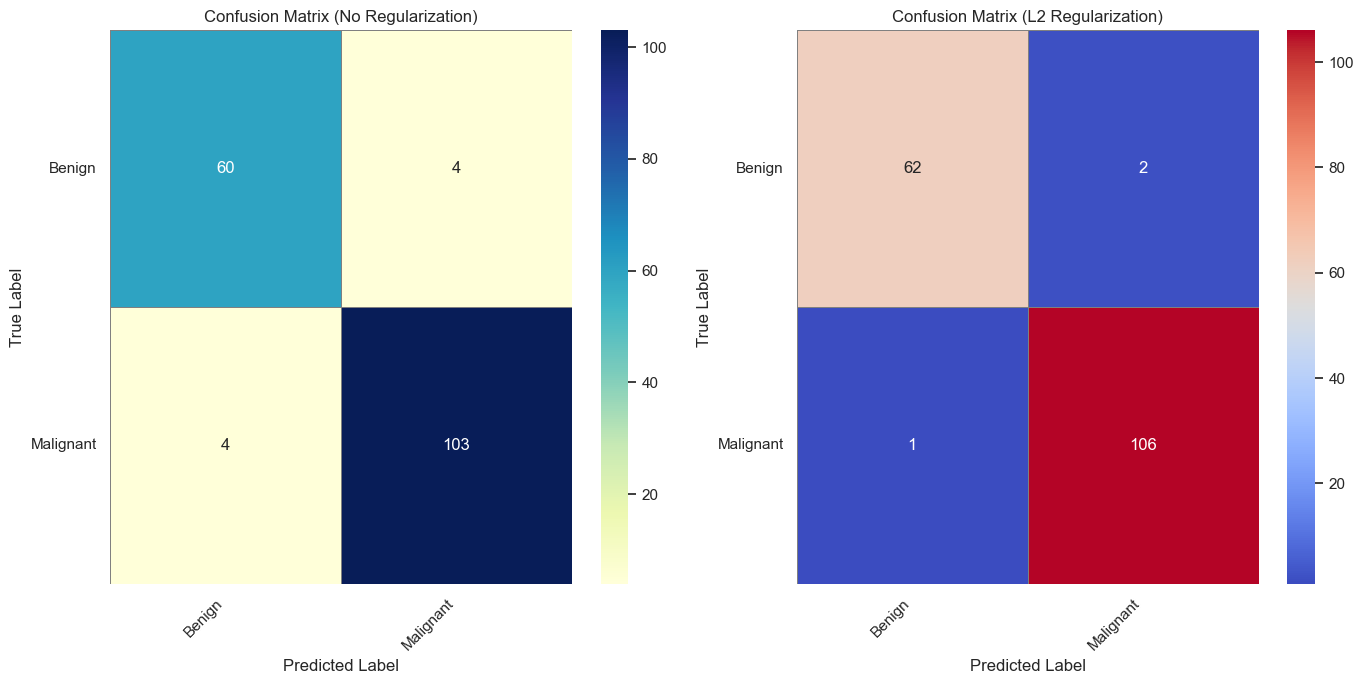

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the confusion matrices
conf_matrix_no_reg = np.array([[60, 4], [4, 103]])
conf_matrix_l2 = np.array([[62, 2], [1, 106]])

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot heatmap for confusion matrix without regularization
sns.heatmap(conf_matrix_no_reg, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
            ax=axes[0], linewidths=0.5, linecolor='gray')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix (No Regularization)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# Plot heatmap for confusion matrix with L2 regularization
sns.heatmap(conf_matrix_l2, annot=True, fmt='d', cmap='coolwarm', cbar=True,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
            ax=axes[1], linewidths=0.5, linecolor='gray')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix (L2 Regularization)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------------